## LABORATORY 04: MACHINE LEARNING II - CLASSIFICATION PROBLEM

#### **Context**

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

#### **Detailed Column Descriptions**
1 - **age** (numeric)

2 - **job**: type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")

3 - **marital**: marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - **education** (categorical: "unknown","secondary","primary","tertiary")

5 - **default**: has credit in default? (binary: "yes","no")

6 - **balance**: average yearly balance, in euros (numeric)

7 - **housing**: has housing loan? (binary: "yes","no")

8 - **loan**: has personal loan? (binary: "yes","no")

**related with the last contact of the current campaign:**

9 - **contact**: contact communication type (categorical: "unknown","telephone","cellular")

10 - **day**: last contact day of the month (numeric)

11 - **month**: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - **duration**: last contact duration, in seconds (numeric)

**other attributes:**

13 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - **previous**: number of contacts performed before this campaign and for this client (numeric)

16 - **poutcome**: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Output variable (desired target):**

17 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

#### 1. Load the dataset

In [3]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sbn
import scripts

In [4]:
# load train and test set
dataset = pd.read_csv("train.csv", sep = ";", low_memory = False)
test_set = pd.read_csv("test.csv", sep = ";", low_memory = False)
dataset.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
common_records = pd.merge(dataset, test_set, how='inner')
print(f"Amount of train records: {len(dataset)}")
print(f"Amount of test records: {len(test_set)}")
print(f"Amount of common records: {len(common_records)}")

Amount of train records: 45211
Amount of test records: 4521
Amount of common records: 4521


The creators of this dataset decided to create a test dataset, taking 10% of the training set there. This is not suitable for our task, so we delete from the dataset what is contained in the test_set

In [6]:
dataset = pd.concat([dataset, test_set, test_set]).drop_duplicates(keep=False)

common_records = pd.merge(dataset, test_set, how='inner')
print(f"Amount of train records: {len(dataset)}")
print(f"Amount of test records: {len(test_set)}")
print(f"Amount of common records: {len(common_records)}")


Amount of train records: 40690
Amount of test records: 4521
Amount of common records: 0


In [7]:
# dimensions of dataset
print("#Train-features = ", dataset.shape[1])
print("#Test-features = ", test_set.shape[1])

#Train-features =  17
#Test-features =  17


In [8]:
# definition of preprocessor
from scripts.preprocess import DataPreprocessing

dp = DataPreprocessing()
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 17 
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Numerical features: 
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical features: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


#### 2. Data Cleaning

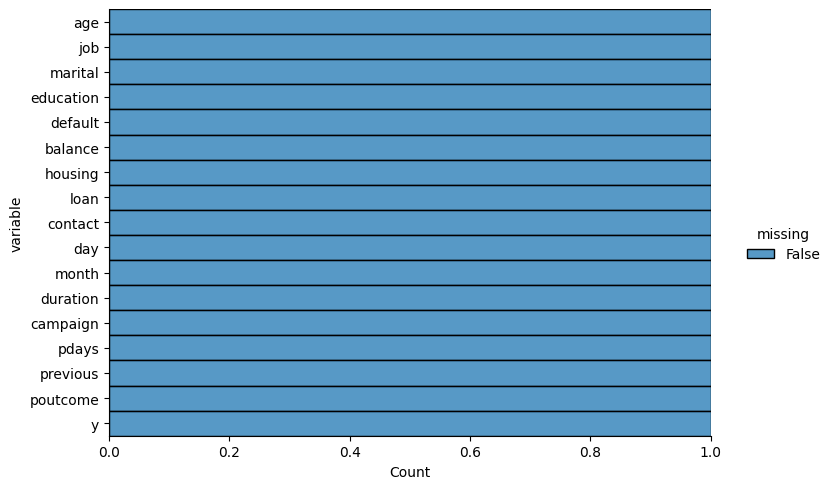

In [9]:
dp.filter_missing(dataset)

In [10]:
dataset["age"]

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 40690, dtype: int64

Clean outliers

In [11]:
def clean_outliers(frame):
    frame.loc[frame["age"] > 65, "age"] = 65
    return frame

In [12]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [13]:
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [14]:
dataset["age"].head(15)

0     58
1     44
2     33
3     47
4     33
5     35
6     28
8     58
10    41
11    29
12    53
13    58
15    51
16    45
17    57
Name: age, dtype: int64

In [15]:
dataset["day"].head(15)

0     5
1     5
2     5
3     5
4     5
5     5
6     5
8     5
10    5
11    5
12    5
13    5
15    5
16    5
17    5
Name: day, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def clean_data(dataset):

    Q1 = dataset['balance'].quantile(0.25)
    Q3 = dataset['balance'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataset = dataset[(dataset['balance'] >= lower_bound) & (dataset['balance'] <= upper_bound)]

    dataset = dataset.drop(columns=['contact', 'day', 'month'], axis=1)

    dataset = dataset.drop_duplicates()

    return dataset

    dataset[column] = dataset[column].fillna(dataset[column].median())


Cleaned dataset

In [17]:
dataset = clean_data(dataset)
dataset.head(5)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown,no


Redefine metadata

In [18]:
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 14 
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')
Numerical features: 
 ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
Categorical features: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']


#### 3. Exploratory Data Analysis

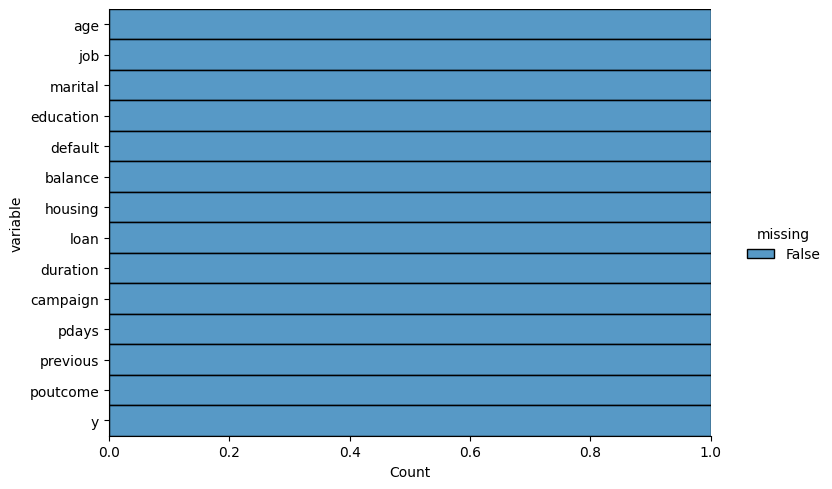

0


In [19]:
# filter missing values
dp.filter_missing(dataset)
print(dataset.isnull().sum().sum())

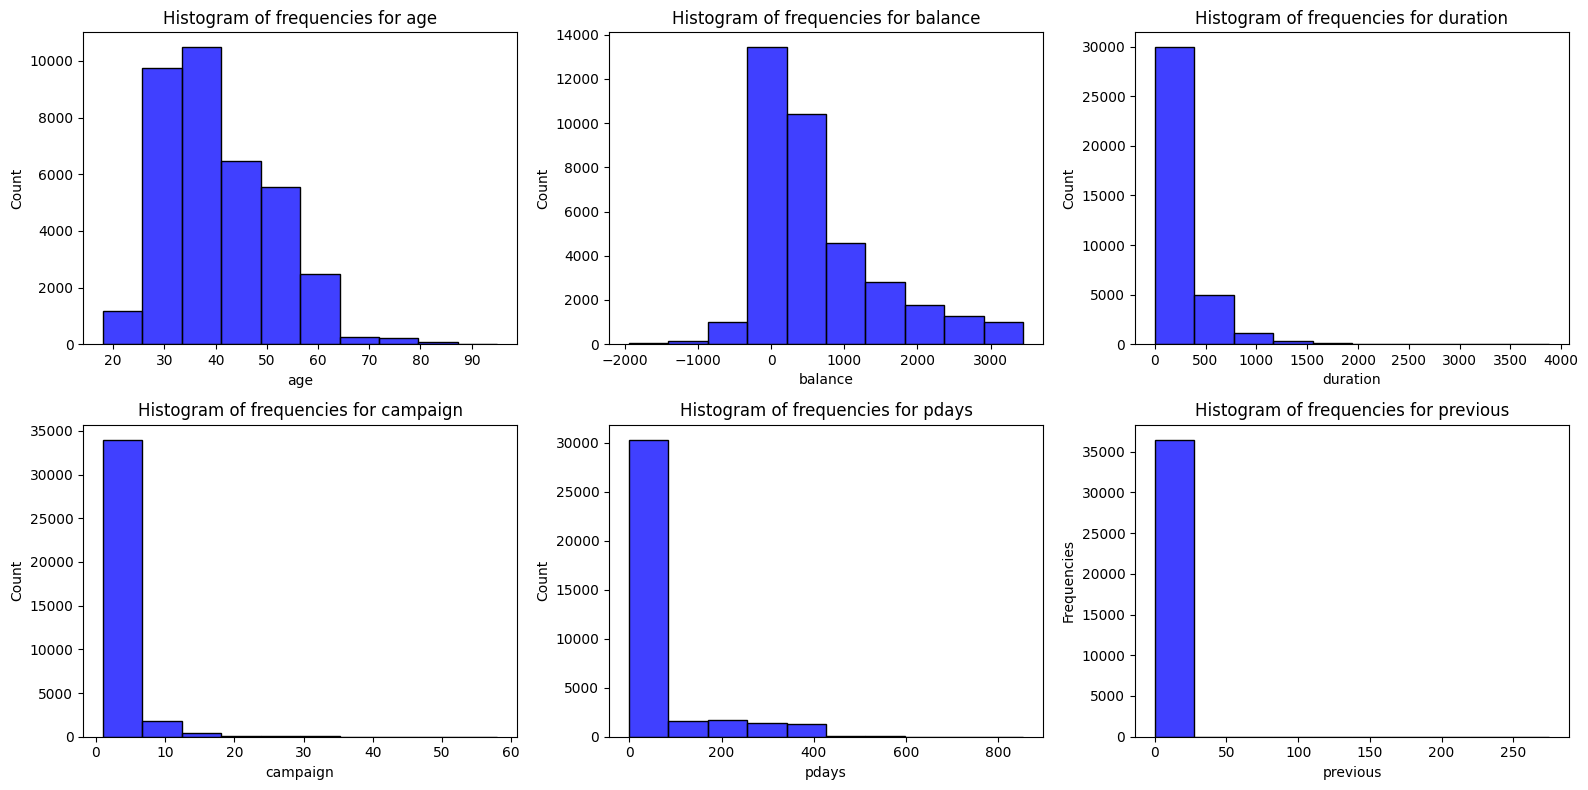

In [20]:
# plot the histogram of frequencies for numerical features
dp.hist_frequencies(dataset, num_cols, bins = 10)

In [21]:
# check the behavior of categorical features
dp.get_categorical_instances(dataset, cat_cols)


***** job ******
job
blue-collar      8077
management       7305
technician       6166
admin.           4298
services         3466
retired          1726
self-employed    1229
entrepreneur     1186
unemployed       1033
housemaid        1005
student           766
unknown           216
Name: count, dtype: int64

***** marital ******
marital
married     21730
single      10473
divorced     4270
Name: count, dtype: int64

***** education ******
education
secondary    19123
tertiary     10313
primary       5561
unknown       1476
Name: count, dtype: int64

***** default ******
default
no     35744
yes      729
Name: count, dtype: int64

***** housing ******
housing
yes    20553
no     15920
Name: count, dtype: int64

***** loan ******
loan
no     30260
yes     6213
Name: count, dtype: int64

***** poutcome ******
poutcome
unknown    29921
failure     3909
other       1463
success     1180
Name: count, dtype: int64

***** y ******
y
no     32398
yes     4075
Name: count, dtype: int64


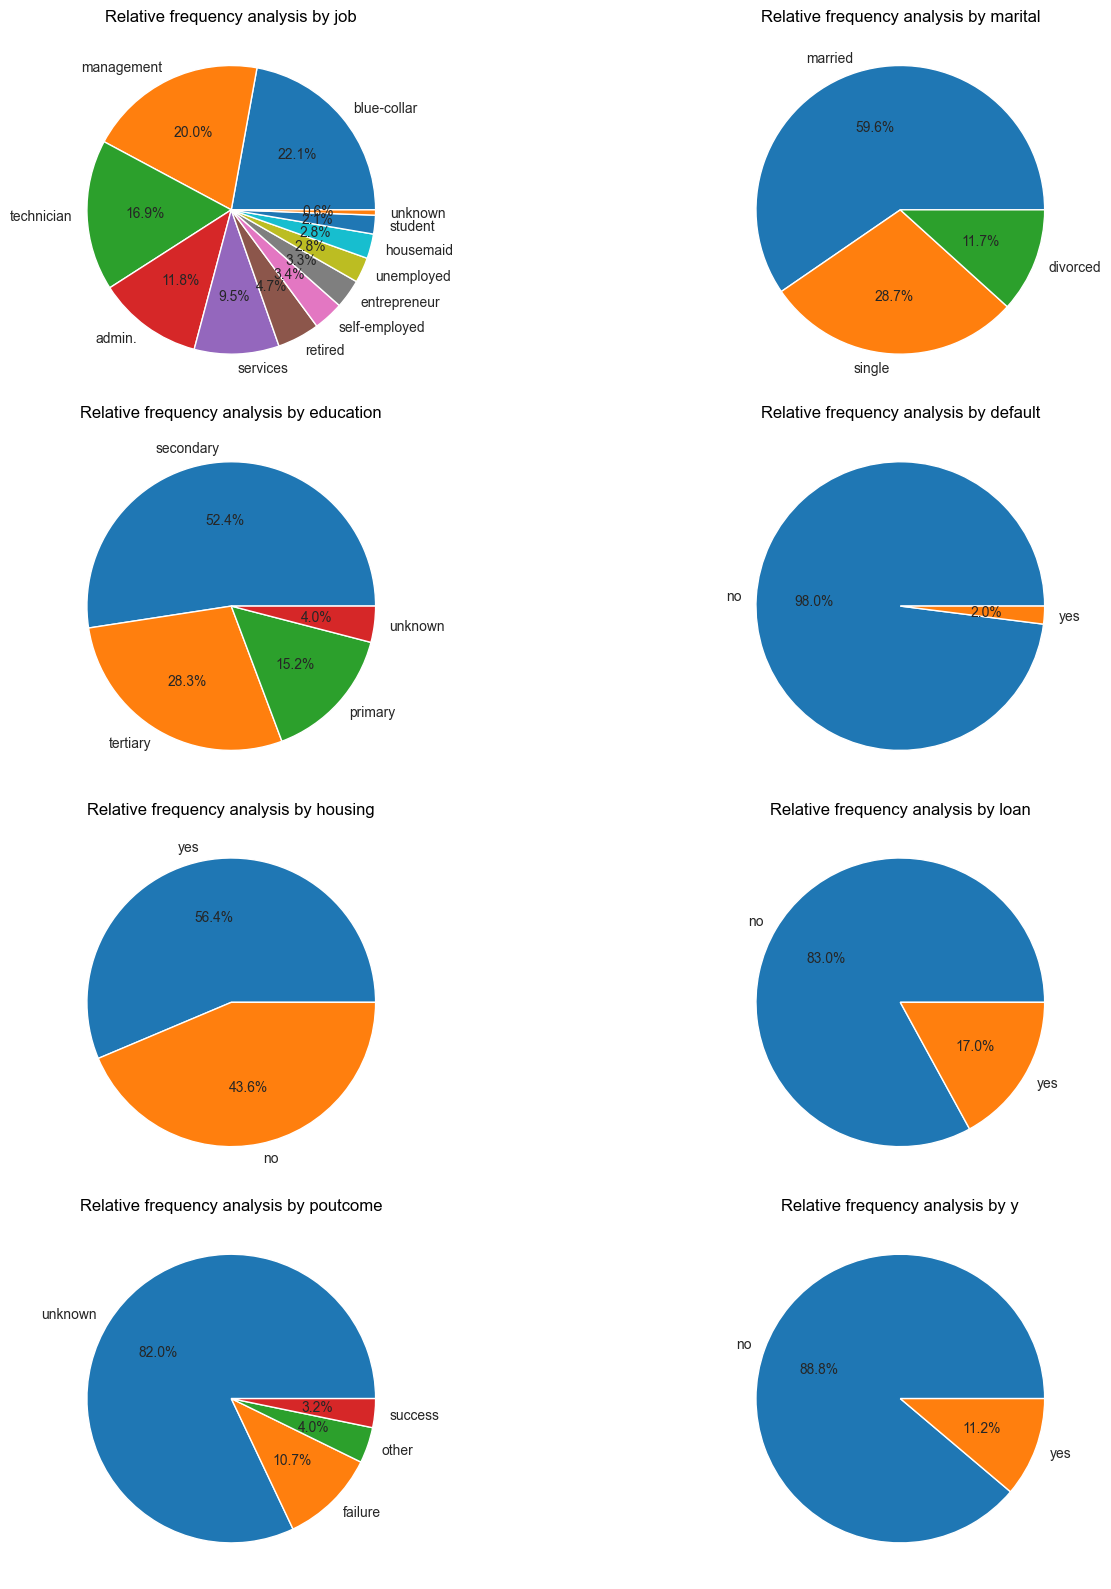

In [22]:
# iteratively pie chart
dp.iter_piechart(dataset, cat_cols)

#### 4. Data preprocessing

In [23]:
# split independent and dependent variables
x = dataset.loc[:, dataset.columns != "y"]
y = dataset["y"]

In [24]:
x.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown


In [25]:
print("Dimension of features = ", x.shape)
print("Dimension of target = ", y.shape)

Dimension of features =  (36473, 13)
Dimension of target =  (36473,)


Split train and test set

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (29178, 13)
Y-train:  29178
X-test dim:  (7295, 13)
Y-test:  7295


In [27]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

transformer = make_column_transformer(
    (StandardScaler(), ["age", "balance", "duration", "campaign", "pdays", "previous"]),

    (RobustScaler(), ["balance", "campaign", "duration", "pdays"]),

    (OneHotEncoder(handle_unknown="ignore"), ["job", "marital", "education", "default",
                                               "housing", "loan", "poutcome"])
)

In [28]:
# transformer will learn only from training data
transformer.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'balance', 'duration', 'campaign',
                                  'pdays', 'previous']),
                                ('robustscaler', RobustScaler(),
                                 ['balance', 'campaign', 'duration', 'pdays']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'poutcome'])])

In [29]:
# transformer will transform the train and test data
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [30]:
x_train

array([[-0.72485293, -0.56169877, -0.14607251, ...,  0.        ,
         0.        ,  1.        ],
       [-1.49027496, -0.37759909,  1.15846809, ...,  0.        ,
         0.        ,  1.        ],
       [-0.91620844,  1.62255479, -0.54413474, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.82053069, -0.50825048,  0.20863642, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.13624685,  1.66056247,  0.01551711, ...,  0.        ,
         0.        ,  1.        ],
       [-1.39459721, -1.01779087,  0.22046005, ...,  0.        ,
         0.        ,  1.        ]])

In [31]:
y_train

5234     no
39199    no
25802    no
16368    no
3586     no
         ..
25313    no
39472    no
37437    no
26042    no
3177     no
Name: y, Length: 29178, dtype: object

In [68]:
classes = np.unique(y)
print("Avalilable classes: ", classes)

Avalilable classes:  ['no' 'yes']


#### 5. Building Models

In [33]:
%reload_ext autoreload
%autoreload 2

KNN Classifier

In [35]:
from scripts.classifiers import KNNModel
import time

# train model
sttrain_knn = time.time()
knn = KNNModel()
knn_model = knn.train(x_train, y_train)

# calculate time
ettrain_knn = time.time()
ttrain_knn = ettrain_knn - sttrain_knn
print(f"Time of training KNN: {ttrain_knn:.3f} seconds")

Best KNN Parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Time of training KNN: 121.403 seconds


c:\Users\79045\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.89176751 0.89012243 0.89488637 0.8937897         nan 0.8907738
        nan 0.89440657 0.89176751 0.89012243 0.89488637 0.8937897
 0.89259023 0.8907738  0.89481788 0.89440657 0.89176751 0.89012243
 0.89488637 0.8937897  0.89259023 0.8907738  0.89481788 0.89440657]
  warnings.warn(


In [36]:
knn_model

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [37]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", knn_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", knn_model.predict(x_test[0:10]))

real values in train:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']
predicted values in train:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']
real values in test:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
predicted values in test:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']


In [41]:
import os

if not os.path.exists("models"):
    os.makedirs("models")

In [45]:
# deploy knn model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="knn_v1.pkl", model=knn_model)

In [46]:
# evaluate knn model
from scripts.evaluator import EvalClassifier
rec_knn = DeployClassifier(path = "models").load_model(filename="knn_v1.pkl")
eval_knn = EvalClassifier(model = rec_knn)

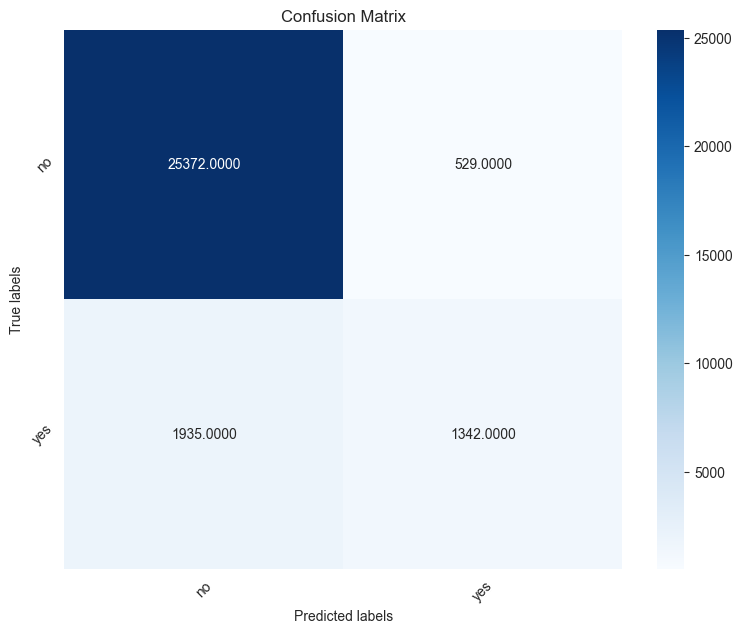

In [47]:
# get confusion matrix in training
y_pred = rec_knn.predict(x_train)
cmknn_train = eval_knn.get_confusion_matrix(y_train.values, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_train, classes)

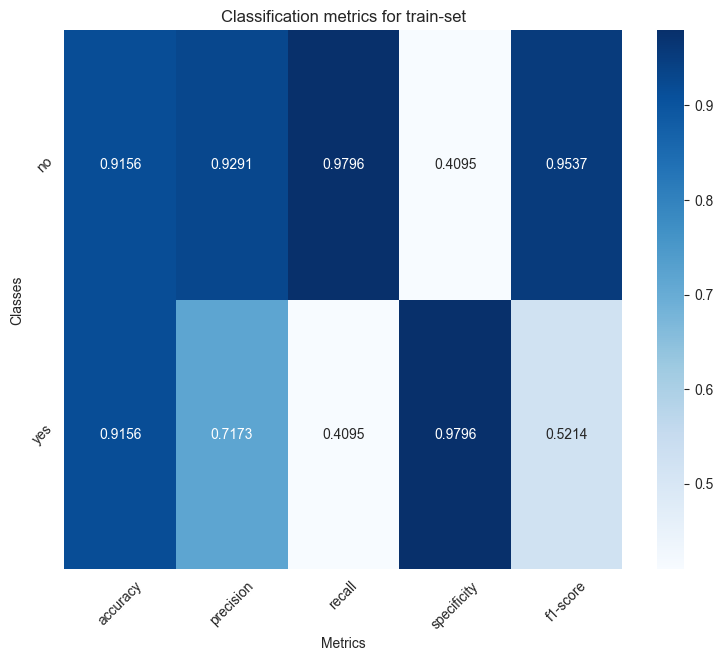

In [48]:
metrics_train_knn = eval_knn.calculate_metrics_by_class(cmknn_train, classes)
eval_knn.plot_metrics_by_class(metrics_train_knn, "Classification metrics for train-set")

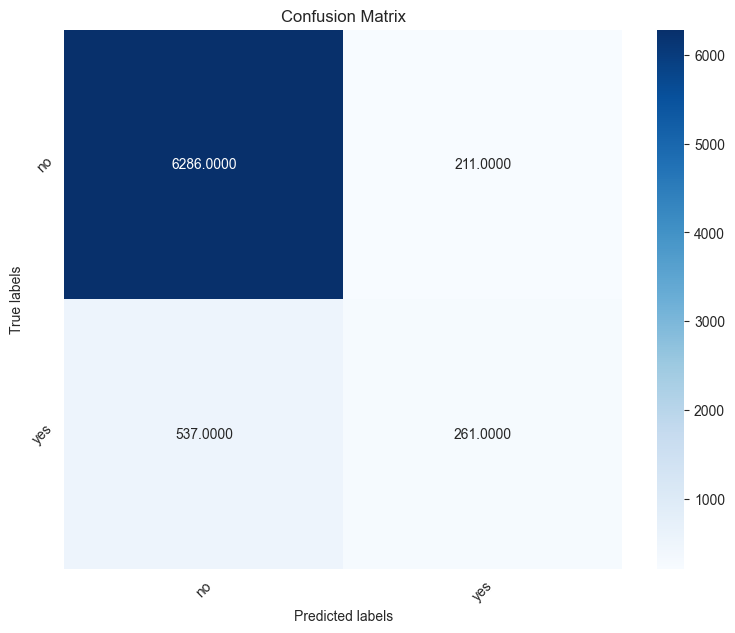

In [49]:
# get confusion matrix in testing
y_pred = rec_knn.predict(x_test)
cmknn_test = eval_knn.get_confusion_matrix(y_test, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_test, classes)

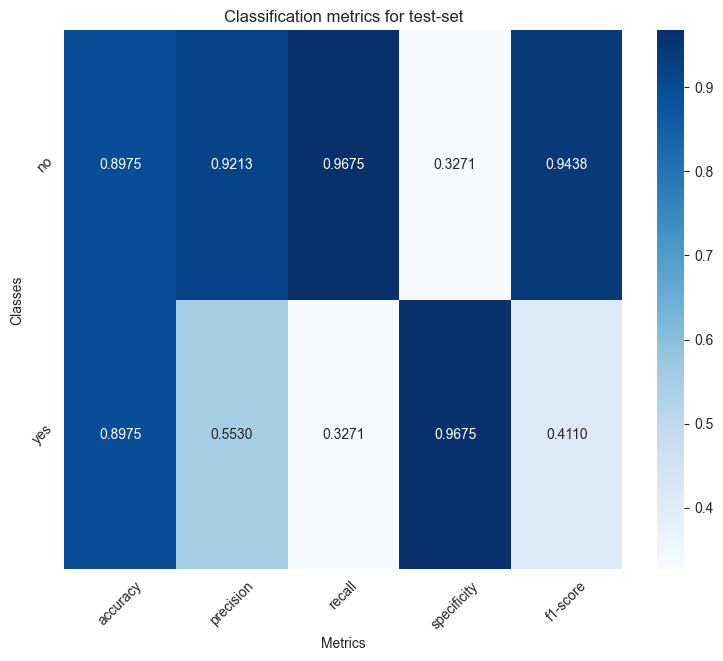

In [50]:
metrics_test_knn = eval_knn.calculate_metrics_by_class(cmknn_test, classes)
eval_knn.plot_metrics_by_class(metrics_test_knn, "Classification metrics for test-set")

In [51]:
# calculate the metrics for whole test set
eval_knn.calculate_metrics_xall(cmknn_test, metrics_test_knn)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.897464,0.737131,0.647296,0.647296,0.677434


SVM Classifier

In [58]:
from scripts.classifiers import SVMModel
import time

# train model
sttrain_svm = time.time()
svm = LinearSVC()
svm_model = svm.fit(x_train, y_train)

# calculate time
ettrain_svm = time.time()
ttrain_svm = ettrain_svm - sttrain_svm
print(f"Time of training SVM: {ttrain_svm:.3f} seconds")

Time of training SVM: 0.420 seconds


In [59]:
svm_model

LinearSVC()

In [60]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", svm_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", svm_model.predict(x_test[0:10]))

real values in train:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']
predicted values in train:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
real values in test:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
predicted values in test:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']


In [63]:
# deploy svm model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="svm_v1.pkl", model=svm_model)

In [64]:
# evaluate svm model
from scripts.evaluator import EvalClassifier
rec_svm = DeployClassifier(path = "models").load_model(filename="svm_v1.pkl")
eval_svm = EvalClassifier(model = rec_svm)

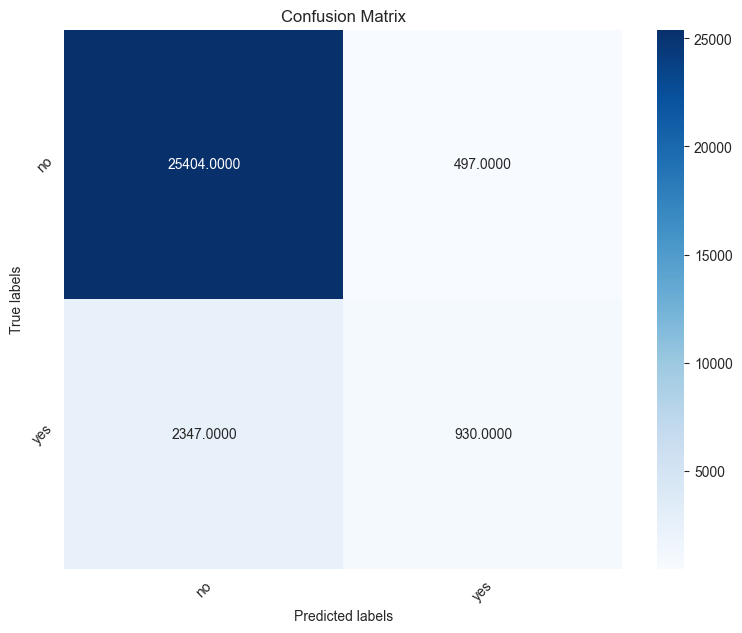

In [65]:
# get confusion matrix in training
y_pred = rec_svm.predict(x_train)
cmsvm_train = eval_svm.get_confusion_matrix(y_train.values, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_train, classes)

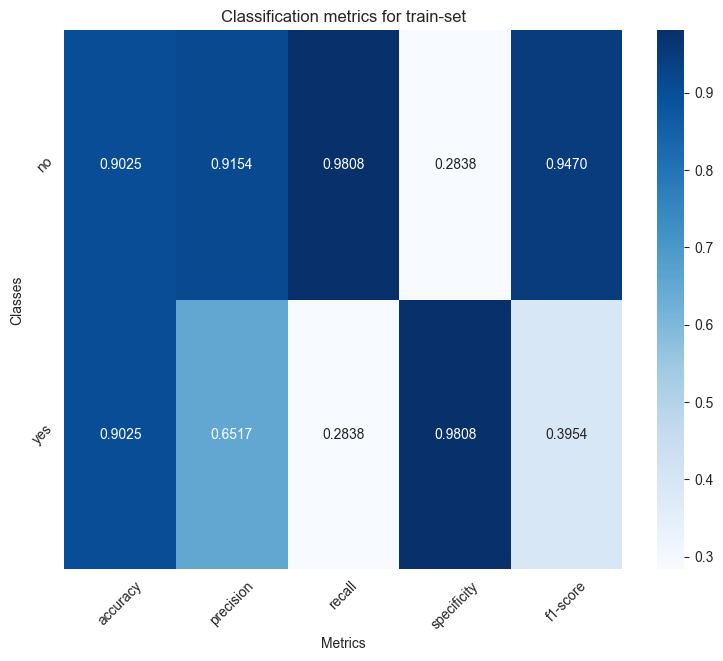

In [66]:
metrics_train_svm = eval_svm.calculate_metrics_by_class(cmsvm_train, classes)
eval_svm.plot_metrics_by_class(metrics_train_svm, "Classification metrics for train-set")

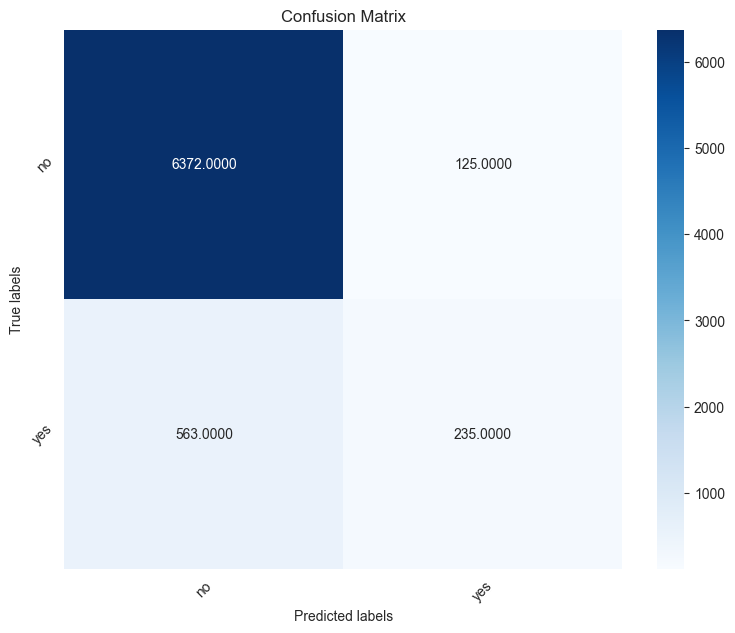

In [71]:
# get confusion matrix in testing
classes = np.unique(y) 
y_pred = rec_svm.predict(x_test)
cmsvm_test = eval_svm.get_confusion_matrix(y_test, y_pred, classes)  
eval_svm.plot_confusion_matrix(cmsvm_test, classes)


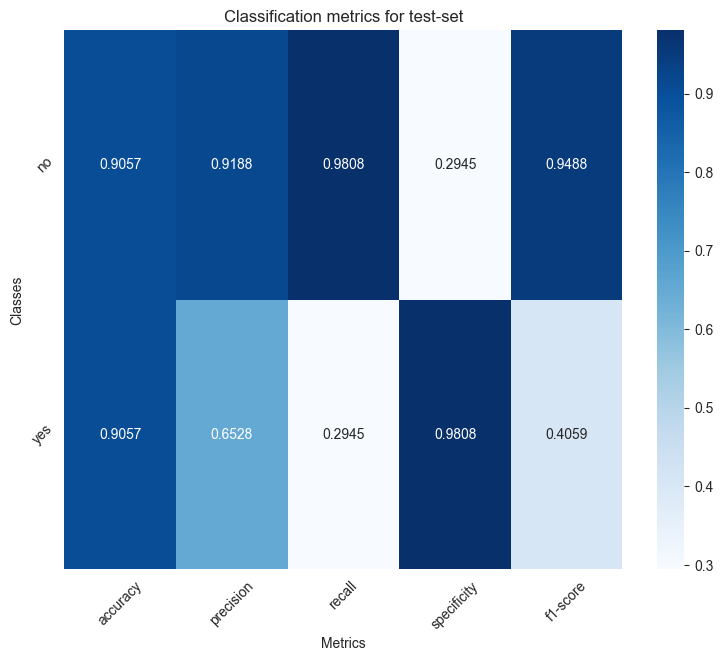

In [72]:
metrics_test_svm = eval_svm.calculate_metrics_by_class(cmsvm_test, classes)
eval_svm.plot_metrics_by_class(metrics_test_svm, "Classification metrics for test-set")

In [73]:
# calculate the metrics for whole test set
eval_svm.calculate_metrics_xall(cmsvm_test, metrics_test_svm)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.905689,0.785798,0.637623,0.637623,0.677326


Random Forest Classifier

In [75]:
from scripts.classifiers import RandomForestModel
import time

# train model
sttrain_rf = time.time()
rf = RandomForestModel()
rf_model = rf.train(x_train, y_train)

# calculate time
ettrain_rf = time.time()
ttrain_rf = ettrain_rf - sttrain_rf
print(f"Time of training Random Forest: {ttrain_rf:.3f} seconds")

Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 20}
Time of training Random Forest: 99.994 seconds


In [76]:
rf_model

RandomForestClassifier(max_depth=10, min_samples_split=20, n_estimators=20)

In [77]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", rf_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", rf_model.predict(x_test[0:10]))

real values in train:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']
predicted values in train:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
real values in test:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
predicted values in test:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']


In [79]:
# deploy rf model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="rf_v1.pkl", model=rf_model)

In [81]:
# evaluate rf model
from scripts.evaluator import EvalClassifier
rec_rf = DeployClassifier(path = "models").load_model(filename="rf_v1.pkl")
eval_rf = EvalClassifier(model = rec_rf)

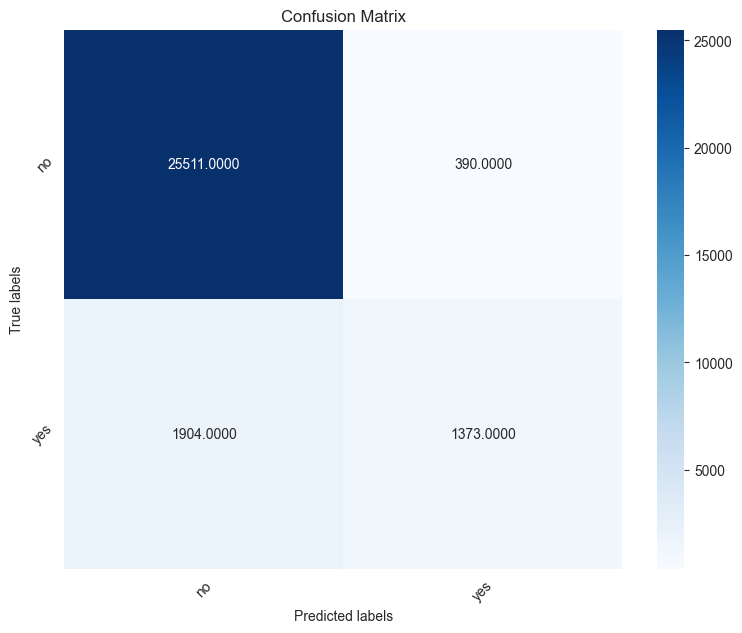

In [82]:
# get confusion matrix in training
y_pred = rec_rf.predict(x_train)
cmrf_train = eval_rf.get_confusion_matrix(y_train.values, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_train, classes)

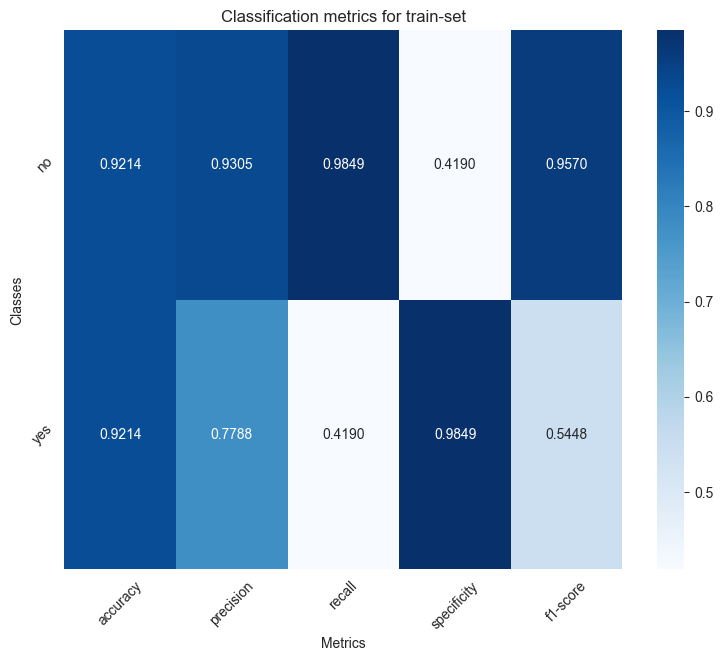

In [83]:
metrics_train_rf = eval_knn.calculate_metrics_by_class(cmrf_train, classes)
eval_rf.plot_metrics_by_class(metrics_train_rf, "Classification metrics for train-set")

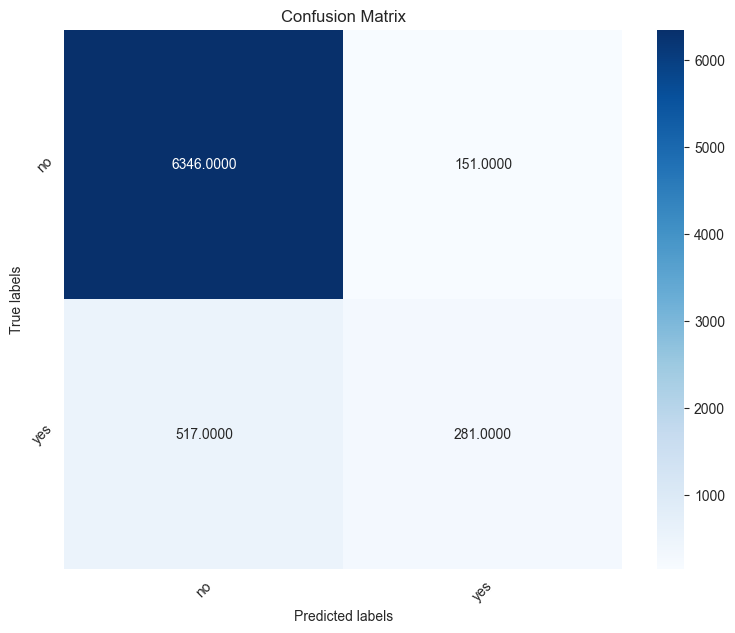

In [86]:
# get confusion matrix in testing
classes = np.unique(y)
y_pred = rec_rf.predict(x_test)
cmrf_test = eval_rf.get_confusion_matrix(y_test, y_pred,classes)
eval_rf.plot_confusion_matrix(cmrf_test, classes)

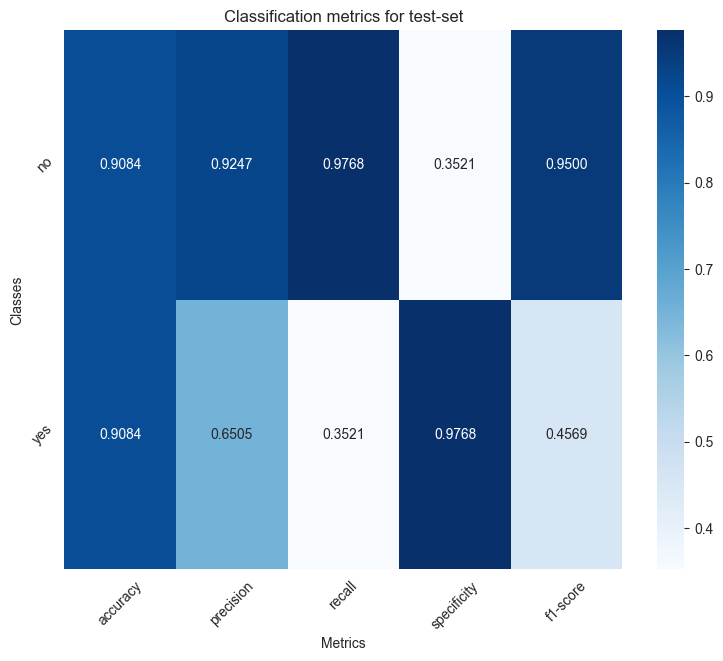

In [87]:
metrics_test_rf = eval_rf.calculate_metrics_by_class(cmrf_test, classes)
eval_rf.plot_metrics_by_class(metrics_test_rf, "Classification metrics for test-set")

In [88]:
# calculate the metrics for whole test set
eval_rf.calculate_metrics_xall(cmrf_test, metrics_test_rf)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.90843,0.787566,0.664444,0.664444,0.703455
